In [1]:
from scipy import sparse
import sys
from sklearn.utils import shuffle
import joblib
sys.path.append("../")
from helper_functions import *

c:\Users\Prash\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
x_train = sparse.load_npz("Data/xtrain.npz")
x_test = sparse.load_npz("Data/xtest.npz")
y_train = np.load("Data/ytrain.npy")
y_test = np.load("Data/ytest.npy")

In [11]:
x = sparse.vstack([x_train, x_test])
y = np.hstack([y_train, y_test])

In [12]:
x_train.shape, x_test.shape, x.shape

((6299, 56796), (1575, 56796), (7874, 56796))

In [13]:
x,y = shuffle(x,y, random_state=1)

In [7]:
log_reg = LogisticRegression()
lgbm = LGBMClassifier()
gboost = GradientBoostingClassifier()
cat = CatBoostClassifier()
sv = SVC()

In [8]:
models = {
    'LogisticRegression': log_reg,
    'LGBMClassifier': lgbm,
    'SVC': sv,
    'GradientBoostingClassifier': gboost,
    'CatBoostClassifier': cat
}

In [7]:
BestParam_search(models, x, y, 2)

Starting Grid Search for Model: LogisticRegression


## The Result for Logistic Regression and LGBM classifier were as follows:
<font size ='5'>
Starting Grid Search for Model: LogisticRegression  <br>                            
Search Finished                                         <br>                            
Best hyperparameters:  {'C': 100, 'l1_ratio': 0.2, 'max_iter': 2000, 'penalty': 'elasticnet', 'solver': 'saga'}<br>         
Best score:  0.6722116939956837                             <br>                                           
------------------------ <br>                                        
Starting Grid Search for Model: LGBMClassifier<br>
Search Finished<br>
Best hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}<br>
Best score:  0.61531530223271<br>
------------------------<br>
Starting Grid Search for Model: SVC <br>
Search Finished<br>
Best hyperparameters:  {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'sigmoid'}<br>
Best score:  0.6732270829551643<br>
------------------------
</font>
<br>
Gradient Boosting and CatBoost were taking too long to figure out so they were dropped

## Finetuned Logistic Regression

In [4]:
log_reg = LogisticRegression(C=100, l1_ratio=0.2, penalty='elasticnet', solver='saga', max_iter=2000)
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

0.6749206349206349

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.6488888888888888

                 Model Performance
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       220
           1       0.68      0.69      0.68       105
           2       0.48      0.46      0.47       114
           3       0.60      0.45      0.51        69
           4       0.74      0.79      0.76       233
           5       0.78      0.68      0.72        93
           6       0.67      0.35      0.46        62
           7       0.71      0.72      0.72       185
           8       0.74      0.75      0.75       128
           9       0.45      0.52      0.48       193
          10       0.95      0.91      0.93       173

    accuracy                           0.67      1575
   macro avg       0.67      0.64      0.65      1575
weighted avg       0.68      0.67      0.67      1575

Accuracy = 67.49%


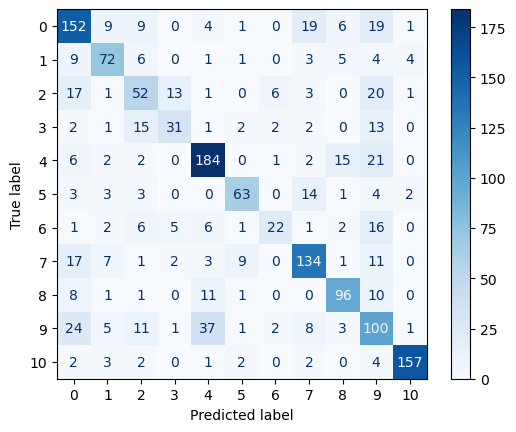

In [8]:
performance(log_reg, x_test, y_test)

In [6]:
log_comp = {
    "LogisticRegression(initial)": lr,
    "LogisticRegression(finetuned)": log_reg
}

compare_performance(log_comp, x_test, y_test)

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,LogisticRegression(initial),0.649,0.570,0.761,0.474,0.529,0.680,0.867,0.571,0.664,...,0.694,0.431,0.209,0.759,0.680,0.116,0.712,0.725,0.435,0.926
1,LogisticRegression(finetuned),0.675,0.631,0.679,0.481,0.596,0.739,0.778,0.667,0.713,...,0.682,0.468,0.512,0.763,0.724,0.463,0.718,0.747,0.482,0.926


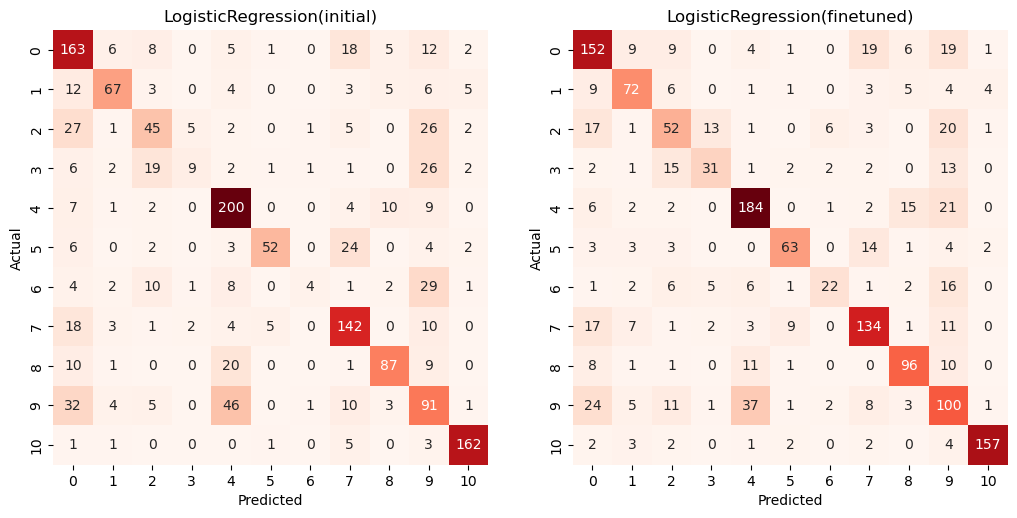

In [7]:
compare_heatmaps(log_comp, x_test, y_test)

In [9]:
joblib.dump(log_reg, 'Models/Fine-tuned/Logistic Regression.pk1')

['Models/Fine-tuned/Logistic Regression.pk1']

## Finetuned LightGBM

                 Model Performance
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       220
           1       0.66      0.59      0.62       105
           2       0.37      0.40      0.38       114
           3       0.51      0.33      0.40        69
           4       0.71      0.78      0.74       233
           5       0.71      0.59      0.65        93
           6       0.53      0.31      0.39        62
           7       0.69      0.71      0.70       185
           8       0.74      0.73      0.74       128
           9       0.40      0.45      0.42       193
          10       0.93      0.88      0.91       173

    accuracy                           0.62      1575
   macro avg       0.62      0.58      0.59      1575
weighted avg       0.63      0.62      0.62      1575

Accuracy = 62.48%


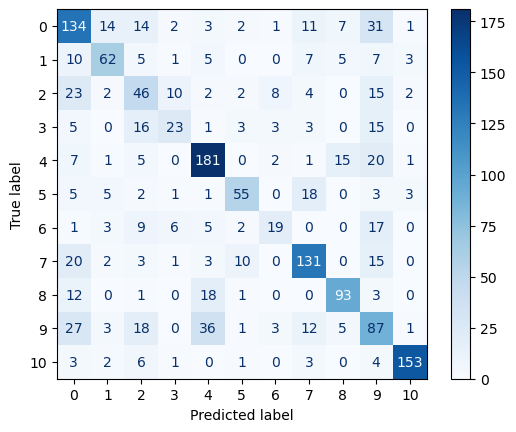

In [17]:
light = LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8)
light.fit(x_train, y_train)
performance(light, x_test, y_test)

                 Model Performance
              precision    recall  f1-score   support

           0       0.54      0.64      0.59       220
           1       0.64      0.55      0.59       105
           2       0.39      0.40      0.40       114
           3       0.50      0.22      0.30        69
           4       0.68      0.78      0.73       233
           5       0.74      0.58      0.65        93
           6       0.54      0.23      0.32        62
           7       0.67      0.73      0.70       185
           8       0.77      0.68      0.72       128
           9       0.38      0.48      0.42       193
          10       0.93      0.87      0.90       173

    accuracy                           0.62      1575
   macro avg       0.62      0.56      0.57      1575
weighted avg       0.63      0.62      0.61      1575

Accuracy = 61.71%


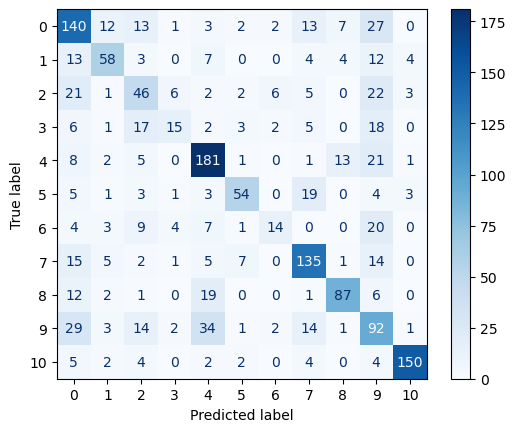

In [12]:
lgbm.fit(x_train, y_train)
performance(lgbm, x_test, y_test)

In [13]:
lgbm_comp = {
    "LGBMClassifier(initial)": lgbm,
    "LGBMClassifier(finetuned)": light
}
compare_performance(lgbm_comp, x_test, y_test)

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,LGBMClassifier(initial),0.617,0.543,0.644,0.393,0.500,0.683,0.740,0.538,0.672,...,0.595,0.398,0.303,0.727,0.651,0.318,0.699,0.722,0.425,0.896
1,LGBMClassifier(finetuned),0.625,0.543,0.660,0.368,0.511,0.710,0.714,0.528,0.689,...,0.623,0.385,0.404,0.742,0.647,0.388,0.699,0.735,0.424,0.908


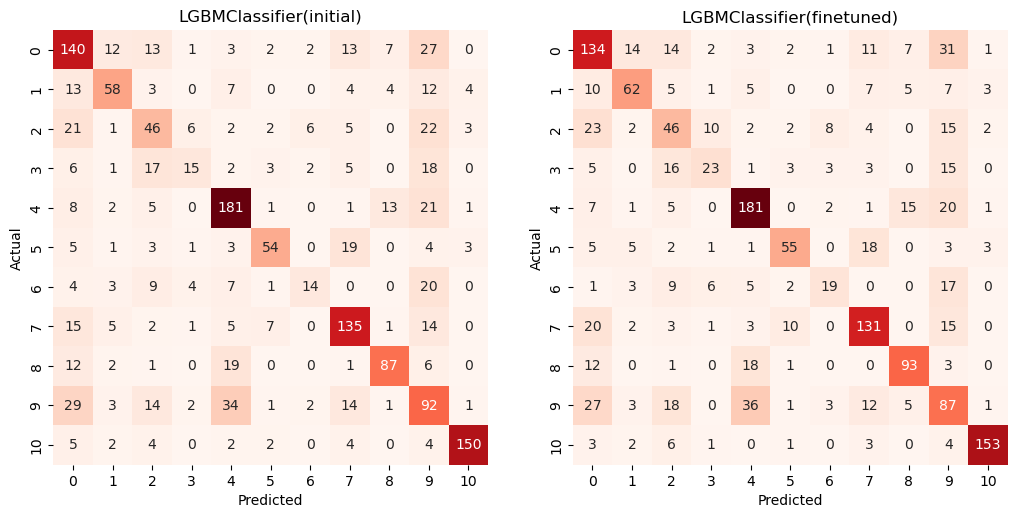

In [14]:
compare_heatmaps(lgbm_comp, x_test, y_test)

                 Model Performance
              precision    recall  f1-score   support

           0       0.55      0.62      0.59       220
           1       0.67      0.60      0.63       105
           2       0.37      0.41      0.39       114
           3       0.54      0.30      0.39        69
           4       0.70      0.75      0.73       233
           5       0.71      0.59      0.64        93
           6       0.50      0.31      0.38        62
           7       0.69      0.71      0.70       185
           8       0.75      0.74      0.75       128
           9       0.40      0.45      0.42       193
          10       0.93      0.90      0.92       173

    accuracy                           0.63      1575
   macro avg       0.62      0.58      0.59      1575
weighted avg       0.63      0.63      0.62      1575

Accuracy = 62.54%


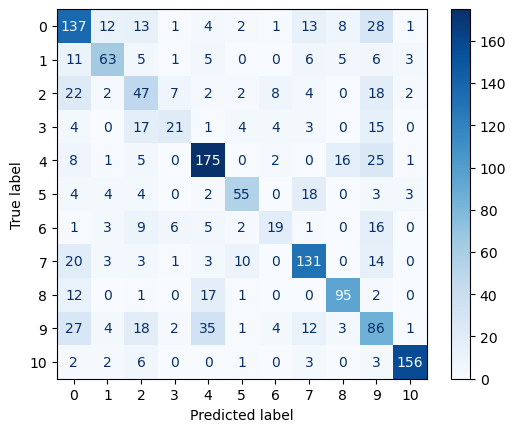

In [20]:
light = LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7)
light.fit(x_train, y_train)
performance(light, x_test, y_test)

In [22]:
joblib.dump(light, 'Models/Fine-tuned/LightGBM.pk1')

['Models/Fine-tuned/LightGBM.pk1']

## Finetuned SVC

In [23]:
vc = SVC()
svc = SVC(C=10, kernel='sigmoid', gamma=0.1, decision_function_shape='ovo')

                 Model Performance
              precision    recall  f1-score   support

           0       0.50      0.78      0.61       220
           1       0.79      0.60      0.68       105
           2       0.55      0.32      0.40       114
           3       0.50      0.06      0.10        69
           4       0.71      0.82      0.76       233
           5       0.89      0.52      0.65        93
           6       0.50      0.03      0.06        62
           7       0.69      0.76      0.72       185
           8       0.83      0.66      0.73       128
           9       0.36      0.52      0.42       193
          10       0.96      0.91      0.93       173

    accuracy                           0.63      1575
   macro avg       0.66      0.54      0.55      1575
weighted avg       0.66      0.63      0.62      1575

Accuracy = 63.3%


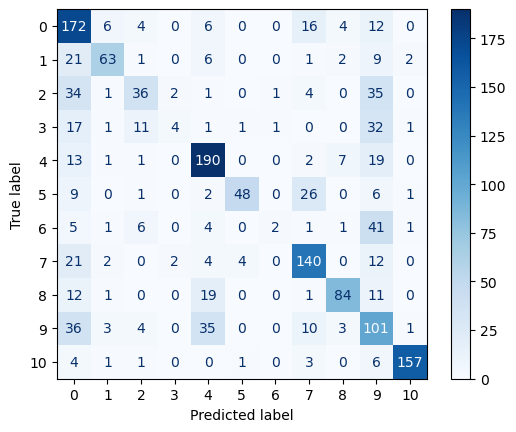

In [15]:
vc = SVC()
vc.fit(x_train, y_train)
performance(vc, x_test, y_test)

                 Model Performance
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       220
           1       0.70      0.70      0.70       105
           2       0.47      0.49      0.48       114
           3       0.62      0.38      0.47        69
           4       0.74      0.79      0.77       233
           5       0.81      0.68      0.74        93
           6       0.74      0.27      0.40        62
           7       0.70      0.73      0.71       185
           8       0.79      0.75      0.77       128
           9       0.46      0.54      0.50       193
          10       0.96      0.92      0.94       173

    accuracy                           0.68      1575
   macro avg       0.69      0.63      0.65      1575
weighted avg       0.69      0.68      0.68      1575

Accuracy = 68.06%


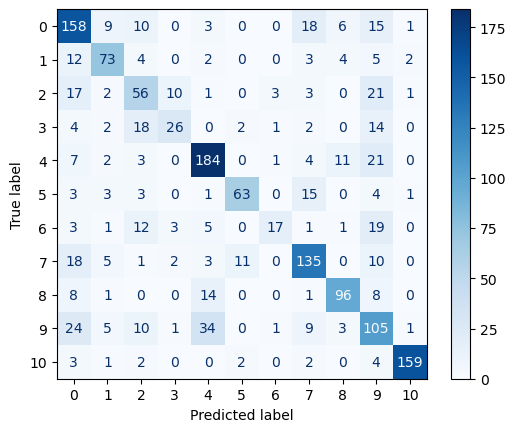

In [7]:
svc = SVC(C=10, kernel='sigmoid', gamma=0.1, decision_function_shape='ovo')
svc.fit(x_train, y_train)
performance(svc, x_test, y_test)

                 Model Performance
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       220
           1       0.70      0.70      0.70       105
           2       0.47      0.49      0.48       114
           3       0.60      0.39      0.47        69
           4       0.75      0.79      0.77       233
           5       0.81      0.68      0.74        93
           6       0.72      0.29      0.41        62
           7       0.70      0.73      0.72       185
           8       0.78      0.75      0.76       128
           9       0.47      0.54      0.51       193
          10       0.96      0.92      0.94       173

    accuracy                           0.68      1575
   macro avg       0.69      0.64      0.65      1575
weighted avg       0.69      0.68      0.68      1575

Accuracy = 68.19%


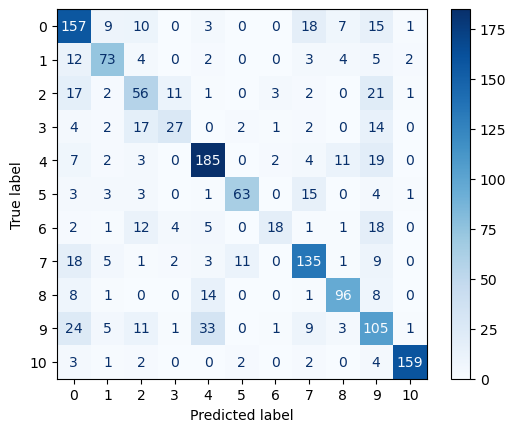

In [8]:
t1 = SVC(C=15, kernel='sigmoid', gamma=0.07, decision_function_shape='ovo')
t1.fit(x_train, y_train)
performance(t1, x_test, y_test)

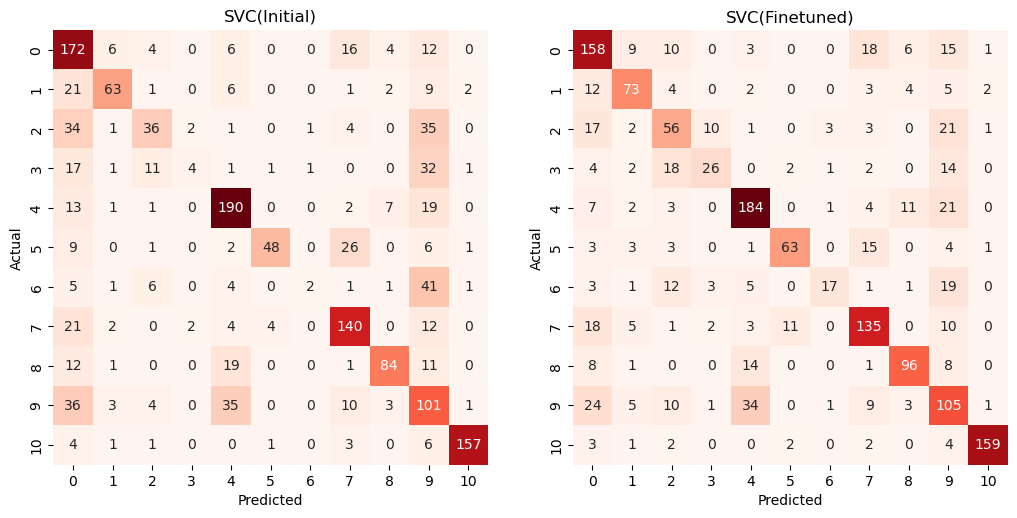

In [26]:
compare_heatmaps(
    {
        'SVC(Initial)':vc,
        'SVC(Finetuned)': svc
    },
    x_test,
    y_test
)

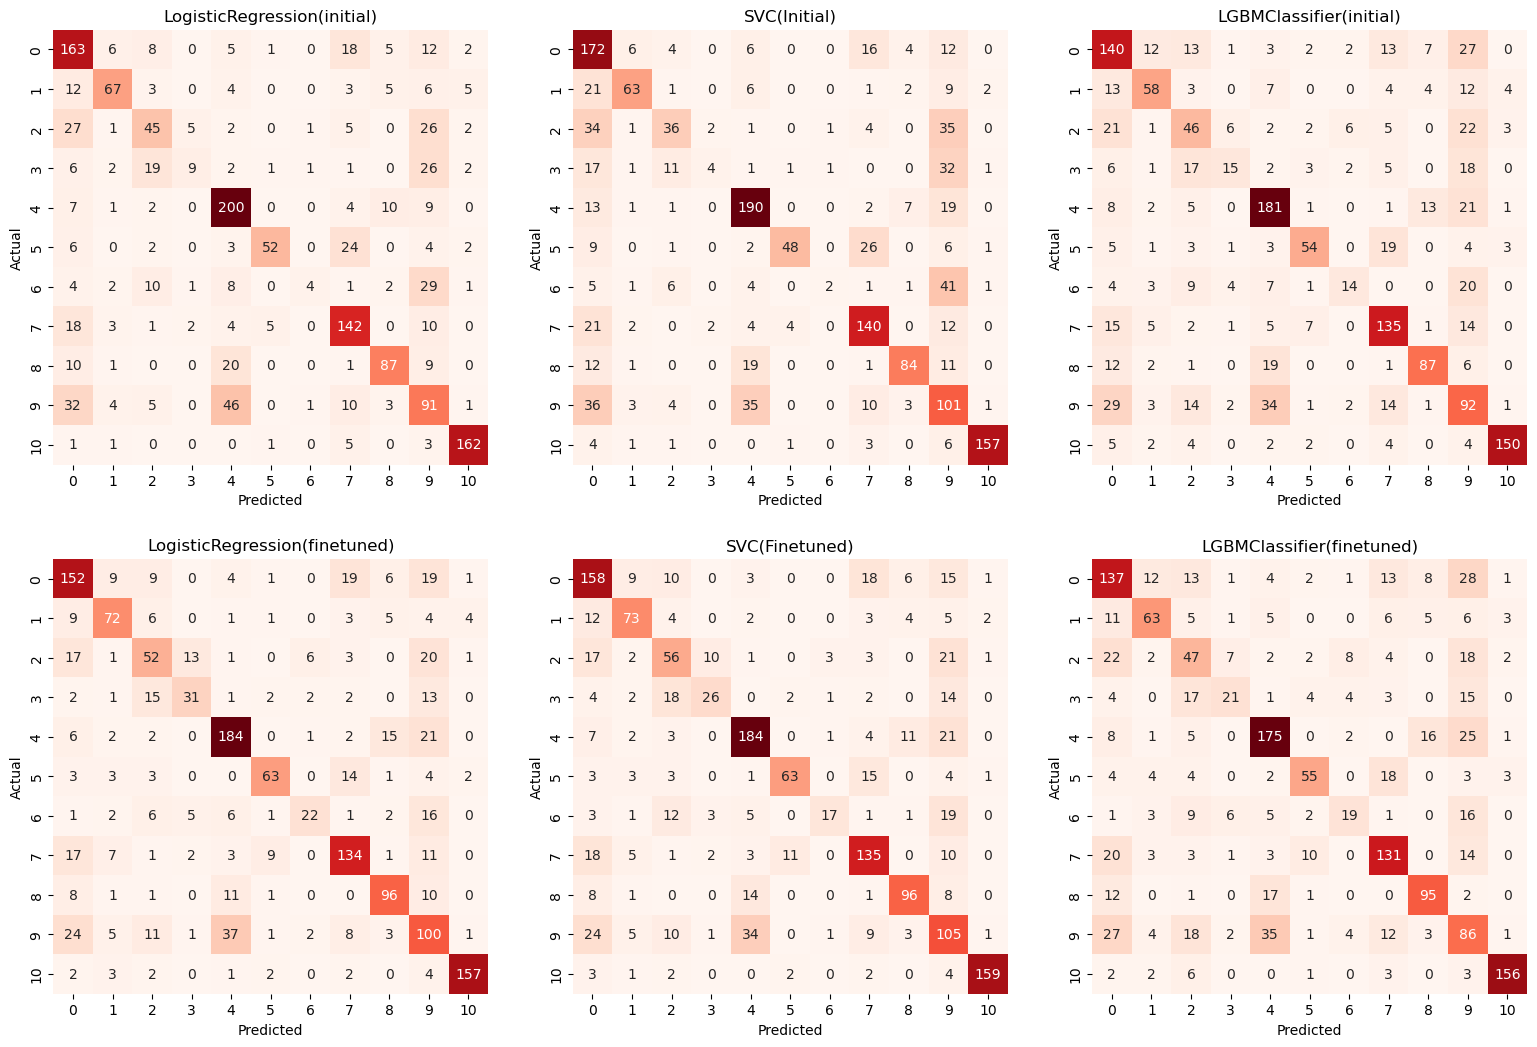

In [31]:
compare_heatmaps(
    {
        "LogisticRegression(initial)": lr,
        'SVC(Initial)':vc,
        "LGBMClassifier(initial)": lgbm,
        "LogisticRegression(finetuned)": log_reg,
        'SVC(Finetuned)': svc,
        "LGBMClassifier(finetuned)": light
    },
    x_test,
    y_test
)

In [10]:
joblib.dump(svc, "Models/Fine-tuned/SVC.pk1")

['Models/Fine-tuned/SVC.pk1']

## Stacking Classifier

                 Model Performance
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       220
           1       0.71      0.75      0.73       105
           2       0.48      0.51      0.49       114
           3       0.63      0.57      0.60        69
           4       0.76      0.79      0.78       233
           5       0.72      0.73      0.72        93
           6       0.51      0.37      0.43        62
           7       0.75      0.74      0.74       185
           8       0.73      0.73      0.73       128
           9       0.55      0.51      0.53       193
          10       0.95      0.91      0.93       173

    accuracy                           0.70      1575
   macro avg       0.68      0.67      0.67      1575
weighted avg       0.69      0.70      0.69      1575

Accuracy = 69.52%


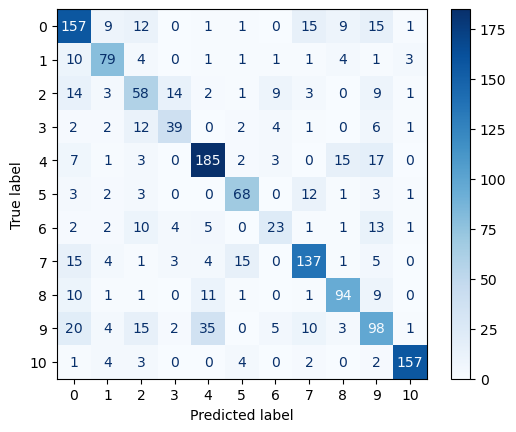

In [12]:
m1 = LogisticRegression()
m2 = SVC()
m3 = LogisticRegression(C=100, l1_ratio=0.2, penalty='elasticnet', solver='saga', max_iter=2000)
m4 = SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')

models = [
    ("LogisticRegression(Initial)", m1),
    ("LogisticRegression(Finetuned)", m3),
    ("SVC(Initial)", m2),
    ("SVC(Finetuned)", m4)
]

from sklearn.ensemble import StackingClassifier

ensemble_1 = StackingClassifier(estimators=models, final_estimator=LogisticRegression(), n_jobs=2)

ensemble_1.fit(x_train, y_train)
performance(ensemble_1, x_test, y_test)

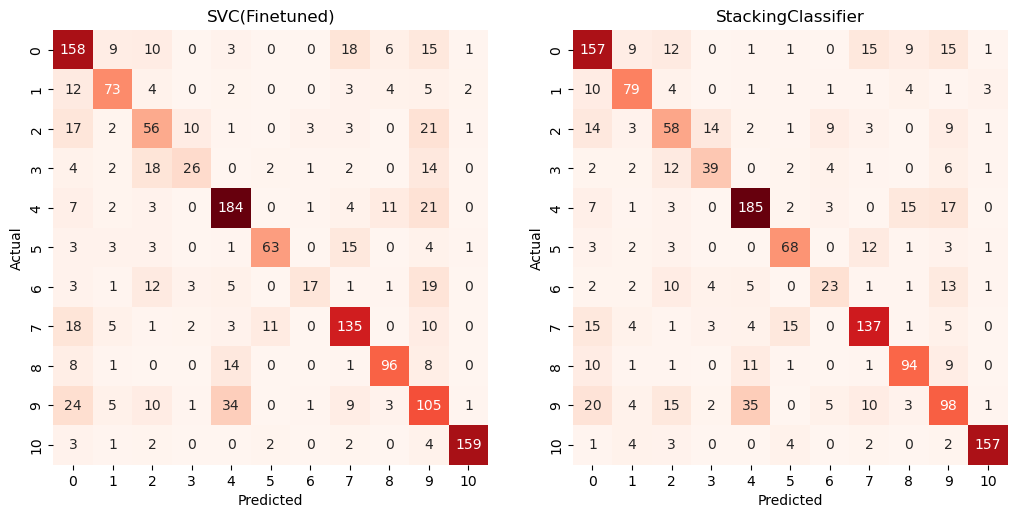

In [19]:
compare_heatmaps(
    {
        'SVC(Finetuned)': svc,
        "StackingClassifier": ensemble_1,
    },
    x_test,
    y_test
)

In [20]:
joblib.dump(ensemble_1, "Models/Fine-tuned/StackingClassifier.pk1")

['Models/Fine-tuned/StackingClassifier.pk1']

In [14]:
from sklearn.model_selection import cross_validate
svc = SVC(C=10, kernel='sigmoid', gamma=0.1, decision_function_shape='ovo')
cv = cross_validate(svc, x, y, scoring='f1_weighted', cv=5, n_jobs=3)

In [15]:
cv['test_score'].mean()

0.6695365991025104